# 1.테슬라 주가 분석하기

이번엔 테슬라 주가에 대한 분석을 해보려고 한다. 주가처럼 연속적인 시간에 따라 다르게 측정되는 데이터를 시계열 데이터라 하며, 이를 분석하는 것을 '시계열 데이터 분석' 이라고 한다. 

### step.1 탐색: 날짜 정보가 포함된 데이터 살펴보기

데이터 출처 : 야후 파이낸스 (https://finance.yahoo.com/), 이것이 데이터 분석이다.(3-2 비트코인 시세분석 참조)


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

분석에 필요한 라이브러리를 불러온다. 주가 분석을 위한 데이터는 주가 변동이 컸었던 2019-01-1부터 2021-03-31까지만 불러왔다.

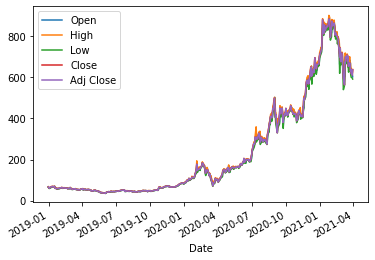

In [3]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2021-03-31', 
                      progress=False)
tsla_df



tsla_df= tsla_df[["Open", "High", "Low", "Close", "Adj Close"]]


tsla_df.plot()
plt.show()

In [4]:
print(tsla_df.shape)
print(tsla_df.info())
tsla_df.tail()

(566, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 566 entries, 2018-12-31 to 2021-03-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       566 non-null    float64
 1   High       566 non-null    float64
 2   Low        566 non-null    float64
 3   Close      566 non-null    float64
 4   Adj Close  566 non-null    float64
dtypes: float64(5)
memory usage: 26.5 KB
None


,Open,High,Low,Close,Adj Close
Date,,,,,
2021-03-24,667.909973,668.020020,630.109985,630.270020,630.270020
2021-03-25,613.000000,645.500000,609.500000,640.390015,640.390015
2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022
2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978
2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995


우선 테슬라 주가 데이터를 탐색하자. 위 결과와 같이 Open,High,Low,Close, Adj Close 총 5개의 피처로 구성되어 있다.

데이터를 확인해 보면 총 5개의 컬럼으로 구성되어 있는데 이번시간에는 High 즉 하루 중 주가가 가장 높았었던 데이터로 예측 분석을 해보려고 한다.

### step.2 예측: 파이썬 라이브러리를 활용해 시세 예측하기



이번 절에서 첫 번째로 사용할 시계열 예측 분석 방법은 ARIMA 분석 방법이다. ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있다. 첫 번째는 AR모델로 자기 자신의 과거를 정보로 사용하는 것이다. 두 번째 개념은 MA모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하겠다' 라는 방법이다. 그리고 이 둘을 합친 것을 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA 모델은 ARMA 모델에 추세 변동의 경향성까지 반영한 방법이다.

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(tsla_df.High.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/home/jaeyoon89/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  565
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2248.038
Method:                       css-mle   S.D. of innovations             12.930
Date:                Tue, 20 Apr 2021   AIC                           4508.077
Time:                        19:25:35   BIC                           4534.098
Sample:                             1   HQIC                          4518.233
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0084      0.556      1.814      0.070      -0.081       2.098
ar.L1.D.y     -1.0444      0.049    -21.205      0.000      -1.141      -0.948
ar.L2.D.y     -0.9208      0.051    -18.002      0.0

/home/jaeyoon89/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
